# Universal Studio Singapore Guest Journey Analysis

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import PercentFormatter
from pathlib import Path

# Ensure inline plotting 
%matplotlib inline  


## Load data

In [20]:
csv_path = Path("../../data/survey.csv").resolve()
print(f"Absolute CSV path: {csv_path}")
print(f"File exists? {csv_path.exists()}")

df = pd.read_csv(csv_path)


Absolute CSV path: C:\Users\huiyx\VSCode Projects\Git\data\survey.csv
File exists? True


## Set Visualisation Style 

In [21]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Calculate Net Promoter Score (NPS)

In [22]:
def calculate_nps(recommend_series):
    promoters = (recommend_series == 'Yes').sum()  
    detractors = (recommend_series == 'No').sum()
    total = recommend_series.count()
    return ((promoters - detractors) / total) * 100

nps = calculate_nps(df['Would you recommend USS to others?'])
print(f"Net Promoter Score: {nps:.1f}")

Net Promoter Score: 48.6


## Analyze Rides and Attractions 

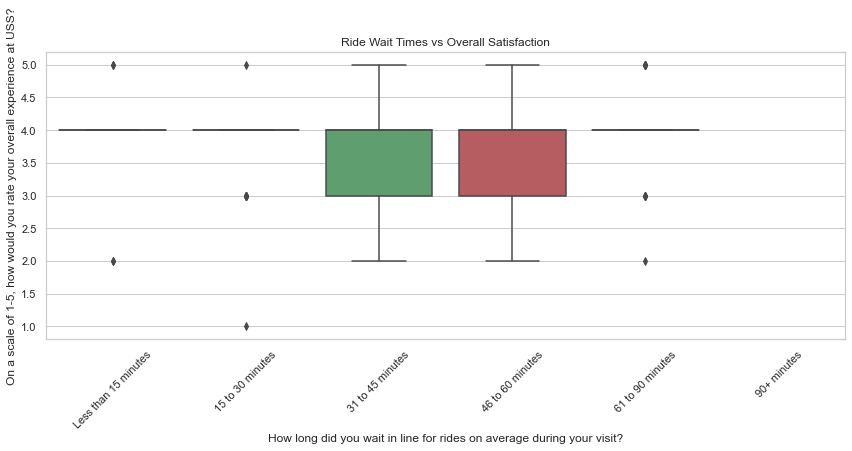

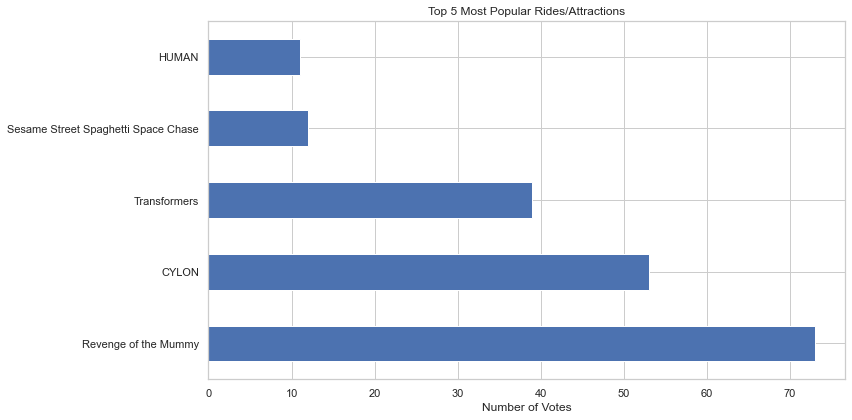

In [23]:
def analyze_rides(df):
    # Ride wait times vs satisfaction
    plt.figure()
    sns.boxplot(x='How long did you wait in line for rides on average during your visit?',
                y='On a scale of 1-5, how would you rate your overall experience at USS?',
                data=df,
                order=['Less than 15 minutes', '15 to 30 minutes', '31 to 45 minutes',
                       '46 to 60 minutes', '61 to 90 minutes', '90+ minutes'])
    plt.title('Ride Wait Times vs Overall Satisfaction')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Most popular rides
    ride_counts = df['Which ride or attraction was your favourite?'].value_counts().head(5)
    plt.figure()
    ride_counts.plot(kind='barh')
    plt.title('Top 5 Most Popular Rides/Attractions')
    plt.xlabel('Number of Votes')
    plt.tight_layout()
    plt.show()

analyze_rides(df)

## Food and Beverage Analysis

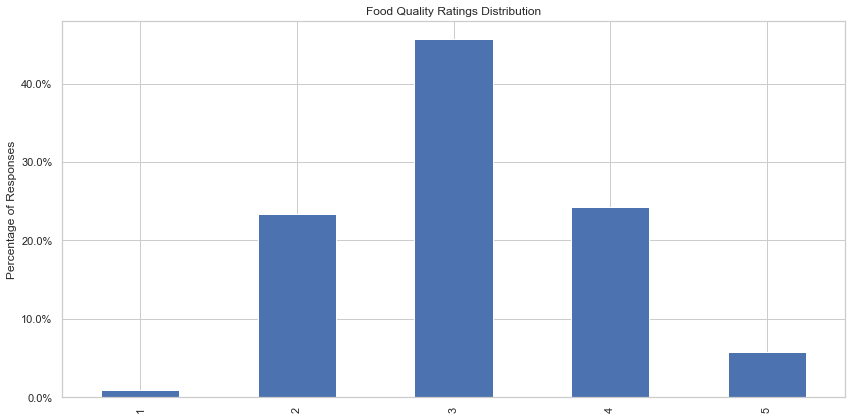

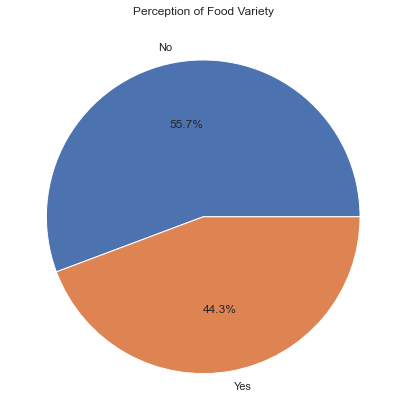

In [24]:
def analyze_food(df):
    # Food quality ratings
    plt.figure()
    df[' How would you rate the food quality and service?  '].value_counts(normalize=True).sort_index().plot(kind='bar')
    plt.title('Food Quality Ratings Distribution')
    plt.ylabel('Percentage of Responses')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.tight_layout()
    plt.show()

    # Food variety
    if df[' Did you find a good variety of food options?  '].dropna().empty:
        print("No data for food variety!")
        return  # Exit if data is missing

    food_variety = df[' Did you find a good variety of food options?  '].value_counts(normalize=True)
    plt.figure()
    food_variety.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Perception of Food Variety')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

analyze_food(df)

## Staff Friendliness Analysis 

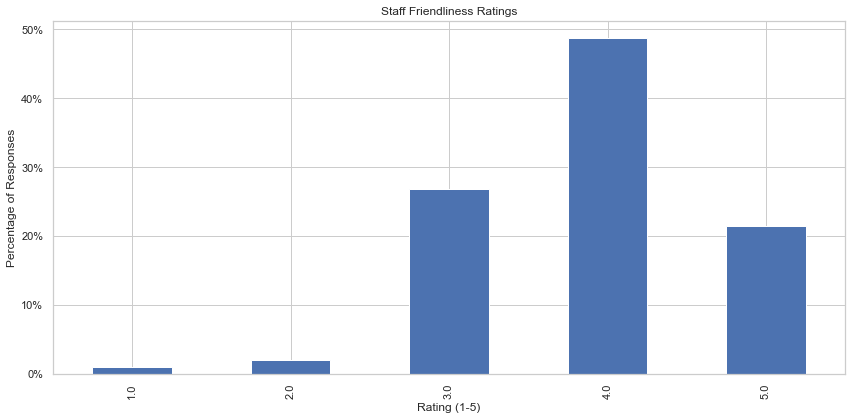

Correlation between staff rating and overall experience: 0.19


In [25]:
# Cell 8: Staff Friendliness Analysis
def analyze_staff(df):
    plt.figure()
    df['Were the park staff at USS friendly and helpful? Rate on a scale from 1-5.'].value_counts(
        normalize=True).sort_index().plot(kind='bar')
    
    plt.title('Staff Friendliness Ratings')
    plt.xlabel('Rating (1-5)')
    plt.ylabel('Percentage of Responses')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.tight_layout()
    plt.show()

    # Correlation between staff rating and overall experience
    staff_corr = df[['Were the park staff at USS friendly and helpful? Rate on a scale from 1-5.',
                    'On a scale of 1-5, how would you rate your overall experience at USS?']].corr().iloc[0,1]
    print(f"Correlation between staff rating and overall experience: {staff_corr:.2f}")

analyze_staff(df)


## Park Experience Analysis

In [26]:
def analyze_park_experience(df):
    crowd_concerns = df['What concerns did you have before deciding to visit USS?'].str.contains(
        'Ride wait times and crowd levels', na=False)
    crowd_satisfaction = df.loc[crowd_concerns, 'On a scale of 1-5, how would you rate your overall experience at USS?'].mean()
    print(f"Average satisfaction from visitors concerned about crowds: {crowd_satisfaction:.2f}/5")

analyze_park_experience(df)

Average satisfaction from visitors concerned about crowds: 3.70/5


##  Pricing & Value Analysis

In [28]:
def analyze_pricing(df):
    # Ticket price concerns
    price_concern = df['What concerns did you have before deciding to visit USS?'].str.contains(
        'Ticket pricing and affordability', na=False)
    price_satisfaction = df[price_concern]['On a scale of 1-5, how would you rate your overall experience at USS?'].mean()
    print(f"Average satisfaction from price-conscious visitors: {price_satisfaction:.2f}/5")

    # Express pass analysis
    express_pass_corr = df[['Did you purchase the Express Pass?',
                           'On a scale of 1-5, how would you rate your overall experience at USS?']].apply(
                               lambda x: x.astype('category').cat.codes).corr().iloc[0,1]
    print(f"Correlation between Express Pass purchase and satisfaction: {express_pass_corr:.2f}")

analyze_pricing(df)

Average satisfaction from price-conscious visitors: 3.66/5
Correlation between Express Pass purchase and satisfaction: 0.11


## Post Visit Sentiments

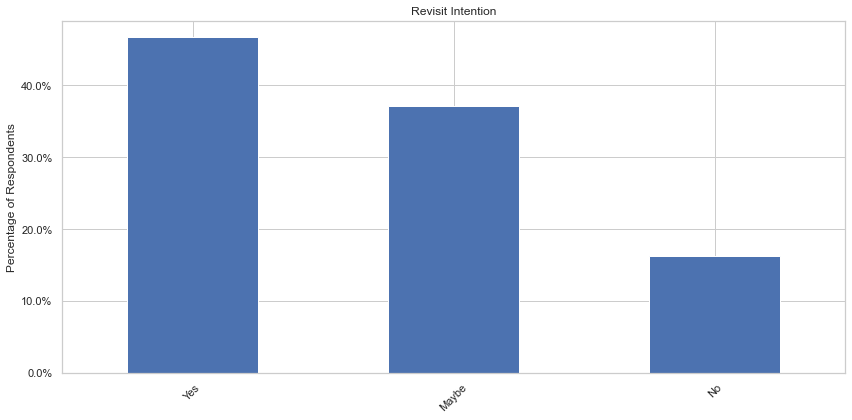

In [32]:
def analyze_post_visit(df):
    # Revisit intention
    revisit_dist = df['Would you choose to revisit USS?'].value_counts(normalize=True)
    plt.figure()
    revisit_dist.plot(kind='bar')
    plt.title('Revisit Intention')
    plt.ylabel('Percentage of Respondents')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.tight_layout()
    plt.savefig('revisit_intention.png')
    plt.show()

analyze_post_visit(df)